In [3]:
#Import necessary libraries

import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from matplotlib import pyplot as plt
import seaborn as sns


In [4]:
# Load the data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

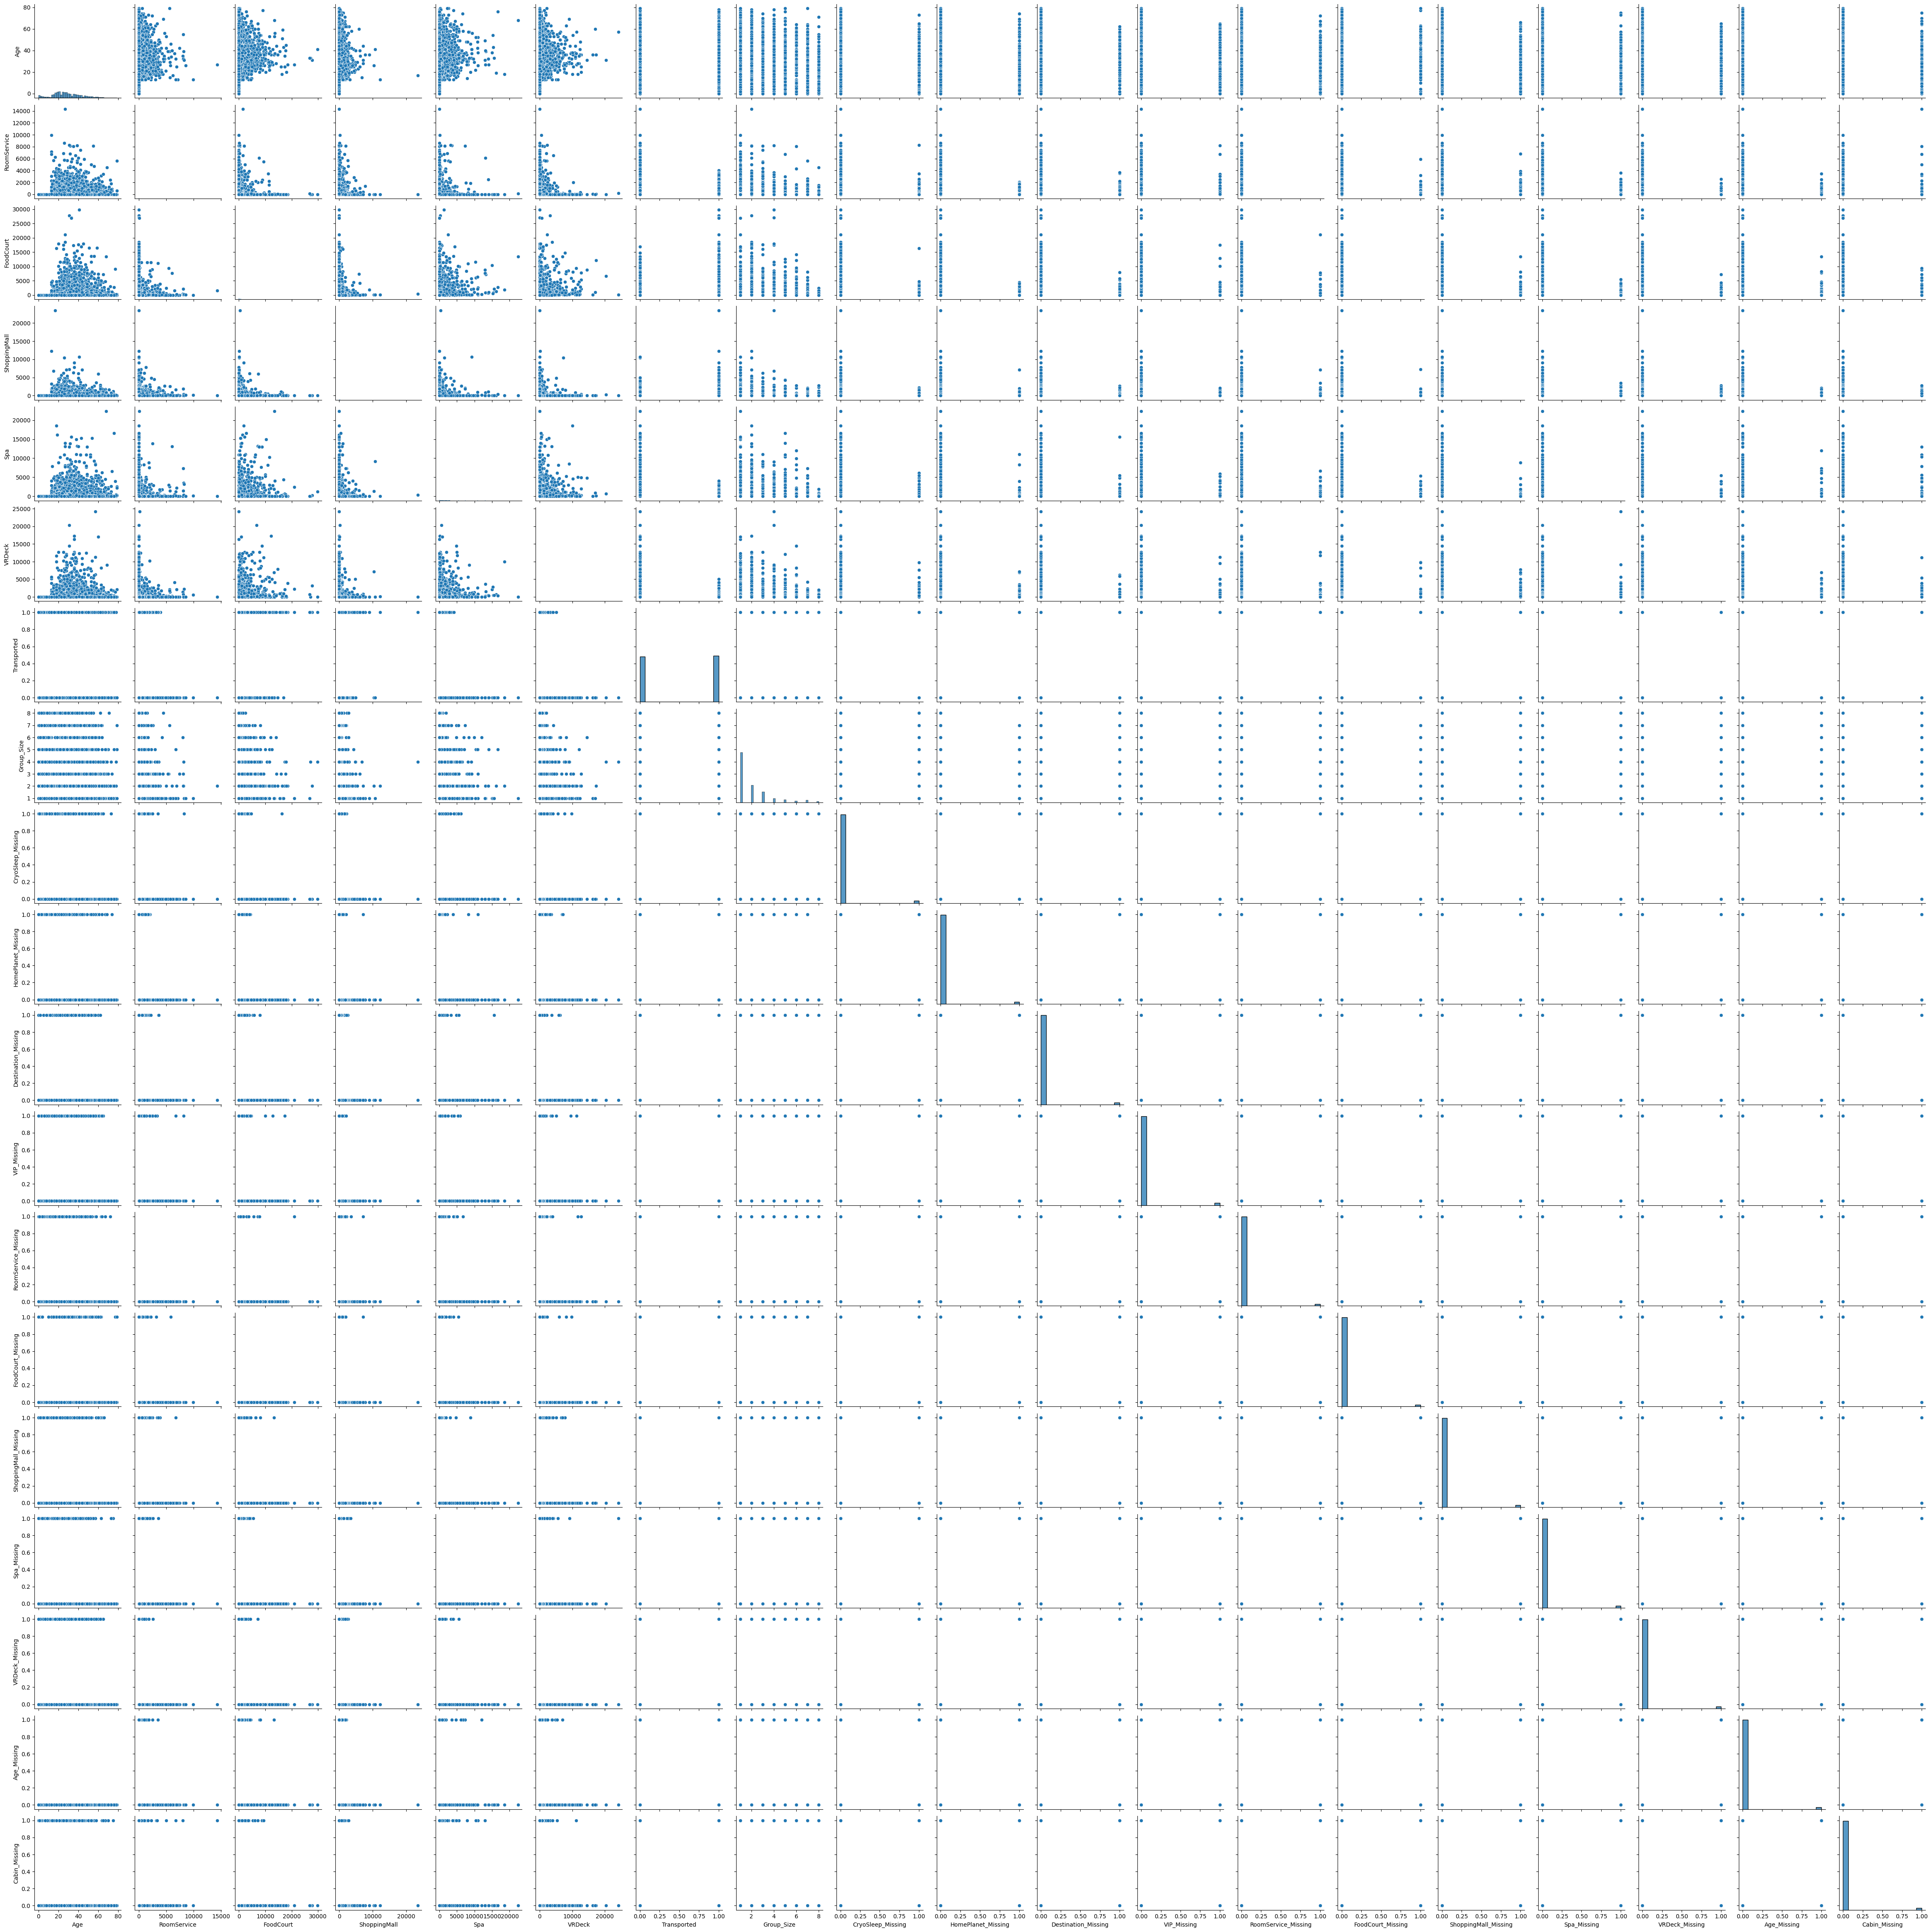

In [26]:
# Visualize Correlations in training set
sns.pairplot(train_data)
plt.show()

In [7]:
# Training Feature Engineering

cabin_parts = train_data['Cabin'].str.split('/', expand=True)
train_data['Cabin_Deck'] = cabin_parts[0]
train_data['Cabin_Number'] = cabin_parts[1]
train_data['Cabin_Side'] = cabin_parts[2]

train_data['Group']=train_data['PassengerId'].str.split('_').str[0]
train_data['Group_Size'] = train_data.groupby('Group')['PassengerId'].transform('count')

features = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age','Cabin']
for feature in features:
    train_data[f'{feature}_Missing'] = train_data[feature].isnull().astype(int)

In [8]:
# Testing Feature Engineering
cabin_parts = test_data['Cabin'].str.split('/', expand=True)
test_data['Cabin_Deck'] = cabin_parts[0]
test_data['Cabin_Number'] = cabin_parts[1]
test_data['Cabin_Side'] = cabin_parts[2]

test_data['Group']=test_data['PassengerId'].str.split('_').str[0]
test_data['Group_Size'] = test_data.groupby('Group')['PassengerId'].transform('count')

features = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age','Cabin']
for feature in features:
    test_data[f'{feature}_Missing'] = test_data[feature].isnull().astype(int)

In [9]:
#Feature preprocessing

features = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck','Age']
number_columns = ['Age','RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Cabin_Number','Group_Size']
categorical_columns = ['CryoSleep', 'HomePlanet', 'Destination', 'VIP','Cabin_Deck', 'Cabin_Side']

for column in categorical_columns:
    if column in train_data.columns:
        train_data[column].fillna('Unknown', inplace=True)
    if column in test_data.columns:
        test_data[column].fillna('Unknown', inplace=True)


FeaturesList = ['CryoSleep', 'HomePlanet', 'Destination', 
                 'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall',
                   'Spa', 'VRDeck','Age','Cabin_Deck','Cabin_Side',
                   'Cabin_Number','Group_Size','CryoSleep_Missing',
                   'HomePlanet_Missing','Destination_Missing','VIP_Missing',
                   'RoomService_Missing','FoodCourt_Missing','ShoppingMall_Missing',
                   'Spa_Missing','VRDeck_Missing','Age_Missing','Cabin_Missing']

FinalFeaturesList = [feature for feature in FeaturesList if feature in train_data.columns]


target = 'Transported'

X = train_data[FinalFeaturesList]
X_test = test_data[FinalFeaturesList]
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)
X, X_test = X.align(X_test, join='left', axis=1, fill_value=0)
y = train_data[target]


C:\Users\Shashwat Tripathi\AppData\Local\Temp\ipykernel_31140\2725668496.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data[column].fillna('Unknown', inplace=True)
C:\Users\Shashwat Tripathi\AppData\Local\Temp\ipykernel_31140\2725668496.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [10]:
#Testing out different models by making a cross validation set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = HistGradientBoostingClassifier()
model2 = XGBClassifier()
model3 = RandomForestClassifier()

In [11]:
# Fit the models
model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)


RandomForestClassifier()

Model 1 Accuracy: 0.8470 | MAE: 0.1530
Model 2 Accuracy: 0.7878 | MAE: 0.2122
Model 3 Accuracy: 0.7878 | MAE: 0.2122


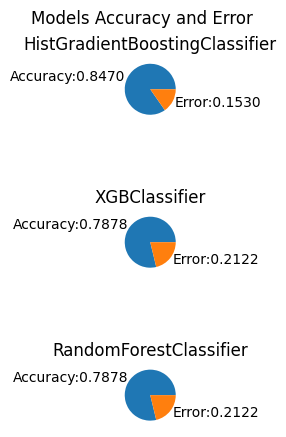

In [24]:
# Evaluate the models
accuracy = model.score(X_val, y_val)
accuracy2 = model2.score(X_val, y_val)
accuracy3 = model3.score(X_val, y_val)
error = mean_absolute_error(y_val, model.predict(X_val))
error2 = mean_absolute_error(y_val, model2.predict(X_val))
error3 = mean_absolute_error(y_val, model3.predict(X_val))
print(f"Model 1 Accuracy: {accuracy:.4f} | MAE: {error:.4f}")
print(f"Model 2 Accuracy: {accuracy2:.4f} | MAE: {error2:.4f}")
print(f"Model 3 Accuracy: {accuracy3:.4f} | MAE: {error3:.4f}")

#Visualizing Accuracy and Error
plt.subplot(5,1,1)
plt.pie(np.array([accuracy,error]),labels=[f"Accuracy:{accuracy:.4f}",f"Error:{error:.4f}"])
plt.title("HistGradientBoostingClassifier")

plt.subplot(5,1,3)
plt.pie(np.array([accuracy2,error2]),labels=[f"Accuracy:{accuracy2:.4f}",f"Error:{error2:.4f}"])
plt.title("XGBClassifier")

plt.subplot(5,1,5)
plt.pie(np.array([accuracy3,error3]),labels=[f"Accuracy:{accuracy3:.4f}",f"Error:{error3:.4f}"])
plt.title("RandomForestClassifier")

plt.suptitle("Models Accuracy and Error")
plt.show()

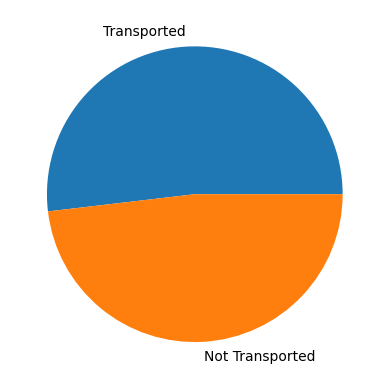

In [ ]:
FinalModel = model # Best model based on validation accuracy and least MAE
FinalModel.fit(X, y)  # Fitting the final model on the entire training data

predictions=FinalModel.predict(X_test)  # Predicting on the test set
plotPredictions = predictions.tolist()
prediction_array = np.array([plotPredictions.count(1),plotPredictions.count(0)])

#Visualize Prediction
plt.pie(prediction_array, labels=["Transported","Not Transported"])
plt.show()


In [40]:
submission = test_data[['PassengerId']]
submission['Transported'] = predictions
submission.to_csv('submission.csv', index=False)



C:\Users\Shashwat Tripathi\AppData\Local\Temp\ipykernel_21608\3150161625.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Transported'] = predictions
